# COS3a Übung 6
---
Abgabe bis 22.11.2022 12:00 Uhr

# LÖSUNG

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Übung

**Speichern Sie alle Grafiken und Antwortsätze in dieser Übung in eine PDF und geben Sie diese zusammen mit dem Code ab.**

Sie können Diagramme, die über matplotlib.pyplot erstellt wurden über [`plt.savefig(DATEINAME.png)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) abspeichern.

### Aufgabe 12 (2 Punkte)

Erweitern Sie die Metropolis Monte Carlo Simulation auf eine zweidimensionale reguläre Lösung aus. Jedes Teilchen hat somit vier Nachbarn.

Wählen Sie die energetischen Parameter $\varepsilon_\mathrm{AA}$, $\varepsilon_\mathrm{BB}$ und $\varepsilon_\mathrm{AB}$ so, dass Sie *grob* die folgenden Gitterkonfigurationen erzeugen können:

1. Schachbrett-Anordnung
2. Phasentrennung
3. zufällige Verteilung

Alle anderen Parameter sollen wie folgt sein:


Speichern Sie ein Bild der Lösung für jeden der zuvor genannten Fälle ab. Erstellen Sie ein PDF Dokument, das die Lösungskonfiguration und die dazugehörigen energetischen Parameter dokumentiert und geben Sie das Dokument zusammen mit Ihrem Code ab.

Tipp: Probieren Sie ihren Code zunächst mit weniger MCS aus. (Bei mir dauert eine Simulation etwa 5 min.)

In [12]:
# Definition der Energievariablen
e_aa = 0.00
e_bb = 0.00
e_ab = -2.00
energy_table = [e_aa, e_ab, e_bb]

# Funktion zur Berechnung der Gitterenergie
def calc_lattice_energy(lattice):

    height = len(lattice)
    width = len(lattice[0])
    
    energy = 0 # Energie des Systems
    for y, row in enumerate(lattice):
        for x, element in enumerate(row):
            # überprüfen wo Nachbarn sitzen unter berücksichtigung periodischer Randbedingung
            neighbor1_pos = ((x - 1) % width, y)
            neighbor2_pos = ((x + 1) % width, y)
            neighbor3_pos = (x, (y + 1) % height)
            neighbor4_pos = (x, (y - 1) % height)

            # energieberechnung
            for (nx, ny) in [neighbor1_pos, neighbor2_pos, neighbor3_pos, neighbor4_pos]:
                neighbor_element = lattice[ny][nx]
                energy += energy_table[element + neighbor_element]/2
    return energy

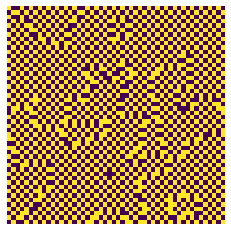

In [14]:
# Definition der Variablen
T = 500
size = 50
mcs_max = 70000


# Erzeugung des Gitters
lattice = []
for _ in range(size):
    row = []
    for _ in range(size):
        row.append(random.choice([0, 1]))
    lattice.append(row)

# Berechnung der Anfangsenergie
energy = calc_lattice_energy(lattice) # Energie des Systems

mcs = 0
while mcs < mcs_max:
    # Zwei Positionen auswählen
    pos1 = [random.randint(0, size-1), random.randint(0, size-1)]
    pos2 = [random.randint(0, size-1), random.randint(0, size-1)]
    
    # Elemente beider Positionen vertauschen
    lattice[pos1[0]][pos1[1]], lattice[pos2[0]][pos2[1]] = lattice[pos2[0]][pos2[1]], lattice[pos1[0]][pos1[1]]   
    
    # Berechnung der neuen Energie
    energy2 = calc_lattice_energy(lattice)

    # Überprüfen ob Vertauschung angenommen wird
    if np.exp(-(energy2-energy)/(8.62e-5*T)) > random.random():
        mcs += 1
        energy = energy2
    else:
        lattice[pos1[0]][pos1[1]], lattice[pos2[0]][pos2[1]] = lattice[pos2[0]][pos2[1]], lattice[pos1[0]][pos1[1]]

# Darstellung des Gitters und des Energieverlaufs
plt.imshow(lattice, interpolation='nearest')
plt.axis("off")
plt.savefig("gitter_mix.png", dpi=300)
plt.show()